<a href="https://colab.research.google.com/github/PedemonteGiacomo/DataScienceProject/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Progetto Introduzione alla Data Science***

Pedemonte Giacomo S4861715

***Importazione librerie per ambiente di lavoro:***

In [1]:
#import seaborn as sb
from sklearn import metrics
from sklearn.model_selection import train_test_split
import plotly.express as px
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
!pip install scipy==1.7.0
import scipy.stats as stats
import scipy
print (scipy.__version__)

1.7.0


***Analisi ed estrazione dei Dati***

Importazione e visualizzazione della "testa" del database contenente la playlist spotify: top50 del 2019





In [2]:
top50 = pd.read_csv('top50.csv')
top50.head()

,Position,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Senorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [3]:
top50.shape

(50, 14)

In [4]:
top50.describe()

,Position,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,14.57738,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,1.00000,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,13.25000,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,25.50000,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,37.75000,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,50.00000,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


Andiamo a vedere ora quante canzoni ci sono per genere in questa top50 andando a visualizzare il tutto con un istogramma:

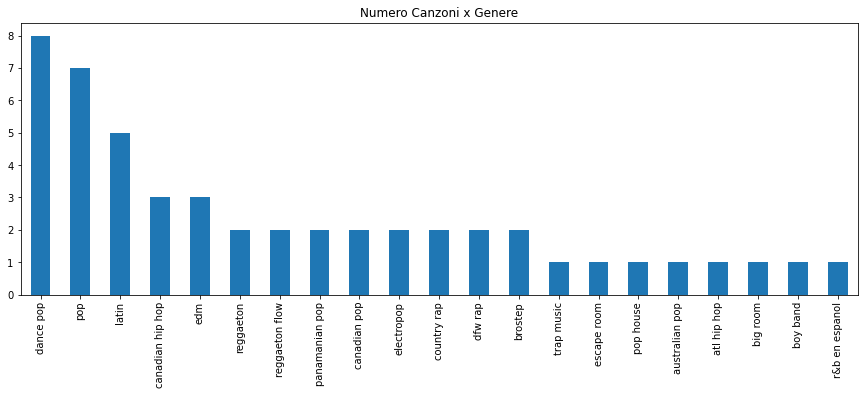

In [5]:
num_genre = top50['Genre'].value_counts()
num_genre.plot(kind = 'bar',title = 'Numero Canzoni x Genere', fontsize = 10, figsize = (15,5))

Vediamo quante canzoni diverse ci sono per ogni artista presente nella playlist:

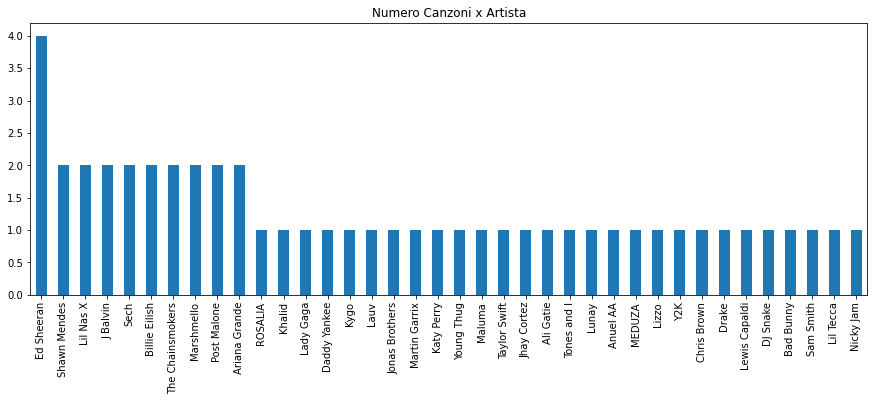

In [6]:
num_artist_name = top50['Artist.Name'].value_counts()
num_artist_name.plot(kind = 'bar',title = 'Numero Canzoni x Artista', fontsize = 10, figsize = (15,5))

Vediamo subito in questo modo che il genere più presente nella top50 del 2019 era il dance pop.
Ci possiamo anche però porre se fosse il più popolare e quindi dobbiamo vedere un istrogramma della popolarità delle canzoni raggruppandole per genere:

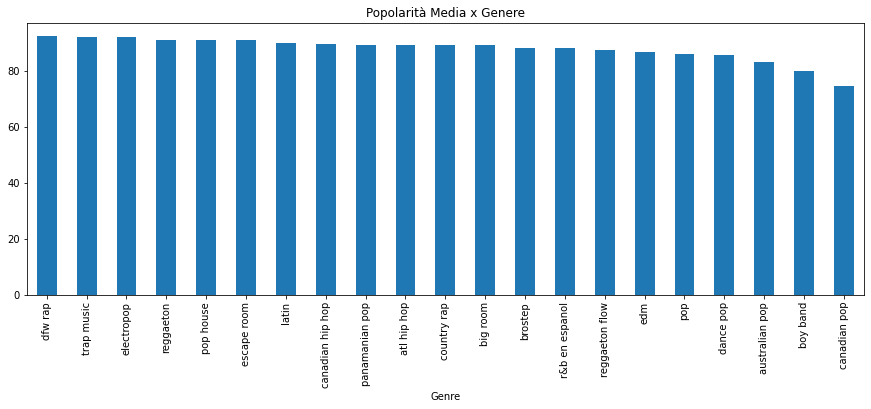

In [7]:
top50.groupby('Genre')['Popularity'].mean().sort_values(ascending = False).plot(kind='bar',title = 'Popolarità Media x Genere', fontsize = 10, figsize = (15,5))

Da questo grafico si evince che il dance pop, il genere che presenta più canzoni nella top50, non è quello che ha la media di popularità più alta.

Vediamo quindi quale genere ha la media più alta di posizionamento in questa top50:

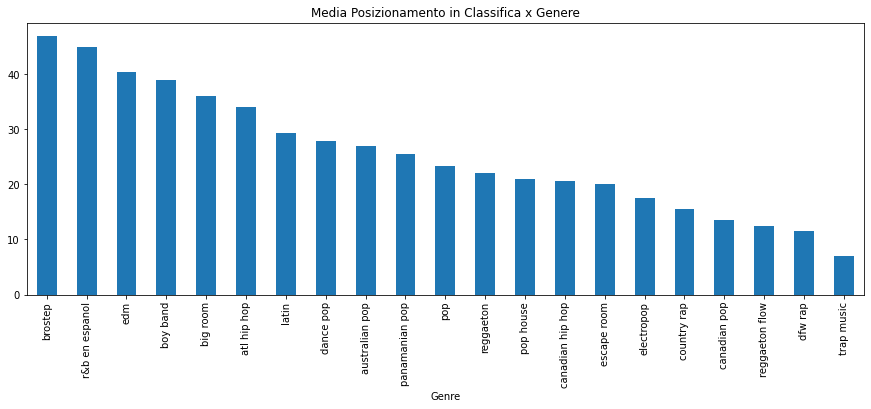

In [8]:
top50.groupby('Genre')['Position'].mean().sort_values(ascending = False).plot(kind='bar',title = 'Media Posizionamento in Classifica x Genere', fontsize = 10, figsize = (15,5))

In questo caso si vede come il genere "messo meglio" in classifica con una media del posizionamento è il genere: trap music

Ora andiamo a vedere le analogie tra genere e Beats Per Minuto:

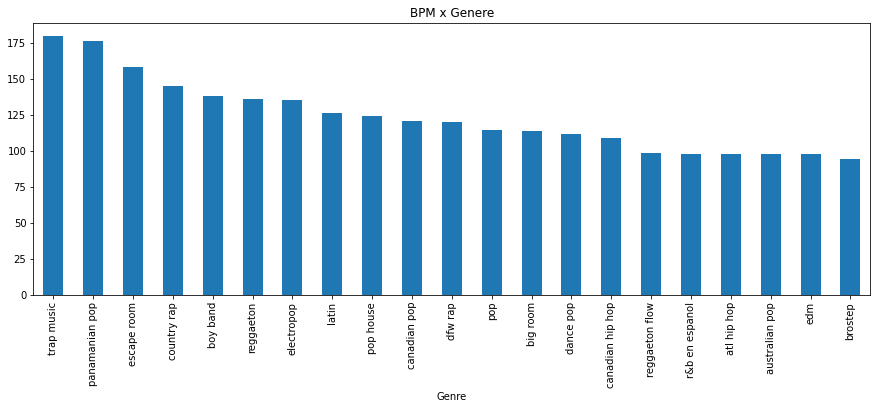

In [9]:
top50.groupby('Genre')['Beats.Per.Minute'].mean().sort_values(ascending = False).plot(kind='bar',title = 'BPM x Genere', fontsize = 10, figsize = (15,5))

Si evince dal grafico soprastante che il genere con più battiti è la trap music.

Andremo poi a studiare se e come infuisce il numero di battiti per minuto con la popolarità della canzone dato che il genere con il più alto numero di bpm è anche il genere piazzato meglio mediamente nella top50 analizzata.

Analizziamo ora qual'è il genere con il maggior numero di parole diverse utilizzate all'intero della canzone: 

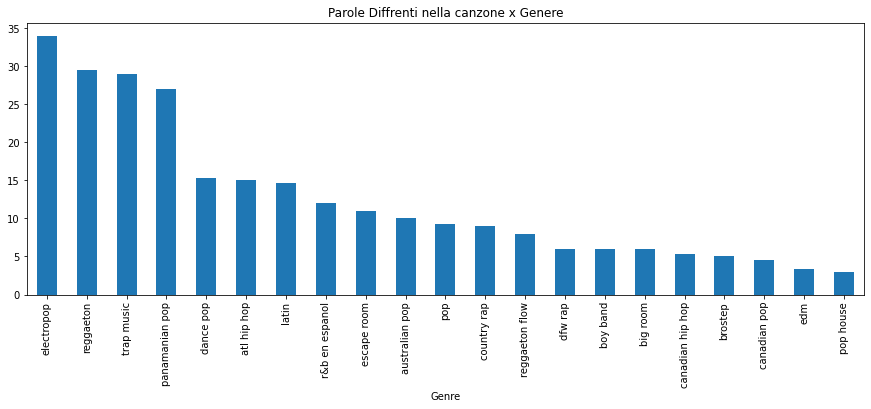

In [10]:
top50.groupby('Genre')['Speechiness.'].mean().sort_values(ascending = False).plot(kind='bar',title = 'Parole Diffrenti nella canzone x Genere', fontsize = 10, figsize = (15,5))

Si vede bene come sia l'electropop il genere che presenta più parole differenti all'interno dei testi delle canzoni.

In questi grafici a dispersione cerchiamo di capire maggiormente se c'è un possibile legame tra gli attributi e la popolarità:

***BPM to Popularity***

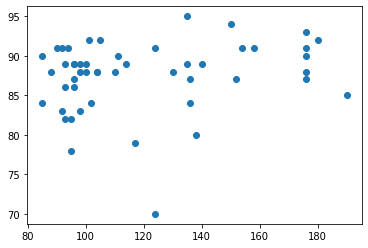

In [11]:
plt.scatter(top50['Beats.Per.Minute'],top50['Popularity'])

Si può dire che all'aumentare dei BPM non aumenta la pooplarità, però si riesce ad estrarre l'informazione che la maggior parte delle canzoni presenti nella playlist che hanno un numero di BPM tra 80 e 120 hano una popolarità abbastanza coesa, mentre più aumenta il valore di BPM e più questa coesione viene meno.

***Position to Popularity***

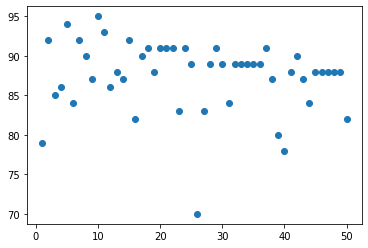

In [12]:
plt.scatter(top50['Position'],top50['Popularity'])

Si riesce ad estrapolare il dato che la canzone prima in classifica non è la più popolare! Quella più popolare si trova circa al decimo posto, un fatto curioso!

***Energy to Popularity***

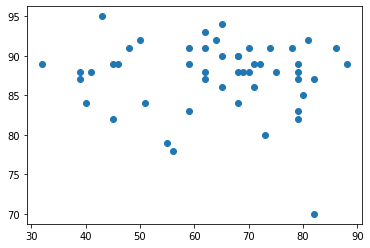

In [13]:
plt.scatter(top50['Energy'],top50['Popularity'])

L'energia della popolarità non sembra essere molto legato alla popolarità, a praticamente qualsiasi livello di energia troviamo un valori di energia coesi.

***Danceability to Popularity***

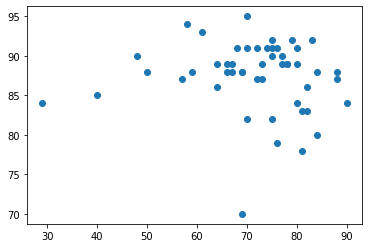

In [14]:
plt.scatter(top50['Danceability'],top50['Popularity'])

Da questo grafico si può notare come nella playlist sia presente un numero predominante di canzoni con un livello di ballabilità alto, però anche la canzone con meno ballabilità ha un valore medio di popolarità, anche se la maggioranza delle canzoni con più ballabilità è più popolare come vediamo dalla densità "di pallini" in alto nel grafico. 

Possiamo anche vedere questo in un unico grafico e trarre le stesse conclusioni:

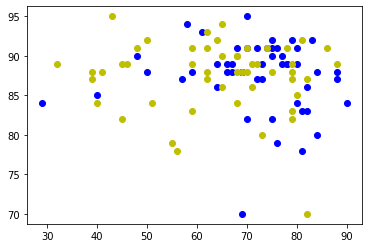

In [15]:
plt.scatter(top50['Danceability'],top50['Popularity'],color='b')
plt.scatter(top50['Energy'],top50['Popularity'],color="y")

***Loudness..dB.. to Popularity***

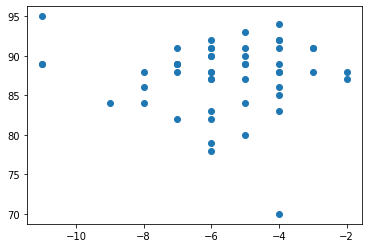

In [16]:
plt.scatter(top50['Loudness..dB..'],top50['Popularity'])

Definition of loudness
: the attribute of a sound that determines the magnitude of the auditory sensation produced and that primarily depends on the amplitude of the sound wave involved.

Detto questo, la canzone con il valore assoluto di loudness maggiore è anche la canzone più popolare, però generalmente non si può dire che all'aumentare di questo valore assoluto aumenti anche la popolarità.


***Liveness  to Popularity***

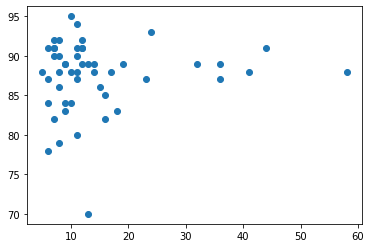

In [17]:
plt.scatter(top50['Liveness'],top50['Popularity'])

Si evince dal grafico che la maggior parte delle canzoni presenti all'interno della playlist hanno una liveness minore di 20, in questo gruppo c'è peraltro la canzone più popolare della playlist.

***Valence to Popularity***

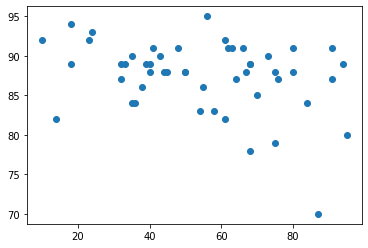

In [18]:
plt.scatter(top50['Valence.'],top50['Popularity'])

La distribuzione dei dati nel grafico sovrastante non ci permette di arrivare a conclusioni che a priori sapevamo ovvero che la popolarità non è legata alla valenza della canzone (sotto si riporta nell'apposita sezione la tabella di correlazione dei dati).

***Length to Popularity***

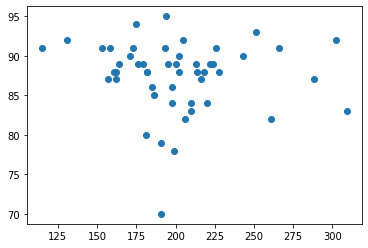

In [19]:
plt.scatter(top50['Length.'],top50['Popularity'])

La maggior parte delle canzoni che sono presenti nella playlist hanno una durata compresa tra i 159 e 225 secondi, tra di queste c'è anche la più popolare. Anche in questo caso comunque non si può nè arrivare alla conclusione che più aumenta la durata e più aumenta la lunghezza della canzone nè viceversa.

***Acousticness to Popularity***

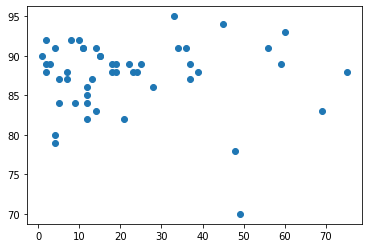

In [20]:
plt.scatter(top50['Acousticness..'],top50['Popularity'])

C'è più coesione nella distribuzione dei dati sulla popolarità delle canzoni con un livello di acousticness compreso tra 0 e 20 quindi la maggior parte delle canzoni nella playlist ha questi valori di acousticness, ma la più popolare si trova nel gruppo restante, dove la varianza della popolarità è notevolmente maggiore, così come il range di acousticness che anch'esso risulta essere più grande(20-80).

***Speechiness to Popularity***

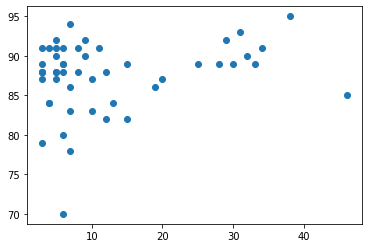

In [21]:
plt.scatter(top50['Speechiness.'],top50['Popularity'])

La maggior parte delle canzoni presenti nella playlist ha un valore di Speechness compreso tra 0 e 10, questo gruppo di canzoni però ha anche una notevole varianza di popolarità, mentre il gruppo restante, dove "risiede" anche la canzone più popolare della playlist ha una varianza di popolarità decisamente inferiore.

***Varianza dei Dati***

Sotto riportiamo il box plot per apprezzare la varianza della mediana del posizionamento di ogni genere, da questo grafico inoltre si evince quali generi presentino la maggior quantità di canzoni e quanto siano distaccati i posizionamenti in classifica di queste:

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


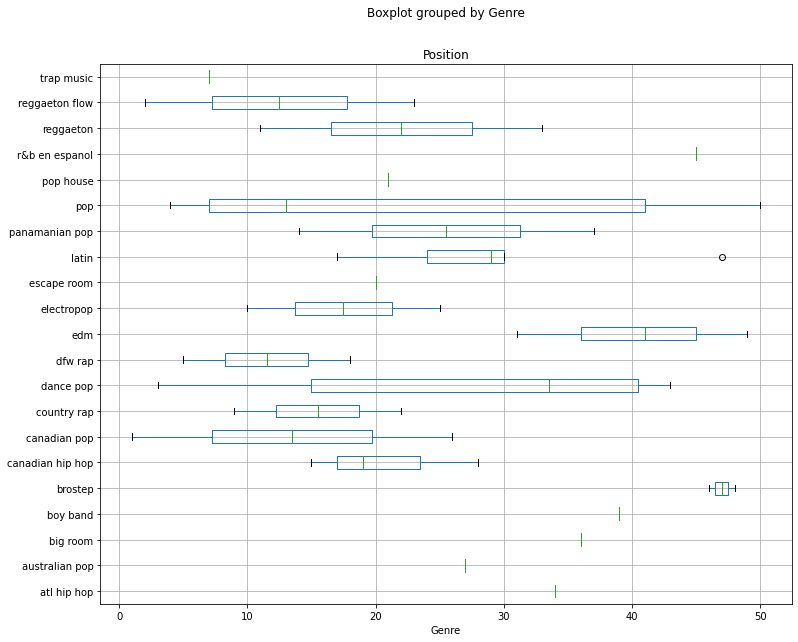

In [22]:
top50.boxplot(column= 'Position', by='Genre', vert=False, fontsize = 10, figsize = (12,10))

Il genere che presenta più varianza nel posizionamento in classifica è il pop seguito non di molto dal dance pop. 
Il primo di questi due -a differenza del secondo- ha la mediana più alta e quindi si evince che ha posizionamenti più alti complessivamente.

Invece per la popolarità media delle canzoni per genere:

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


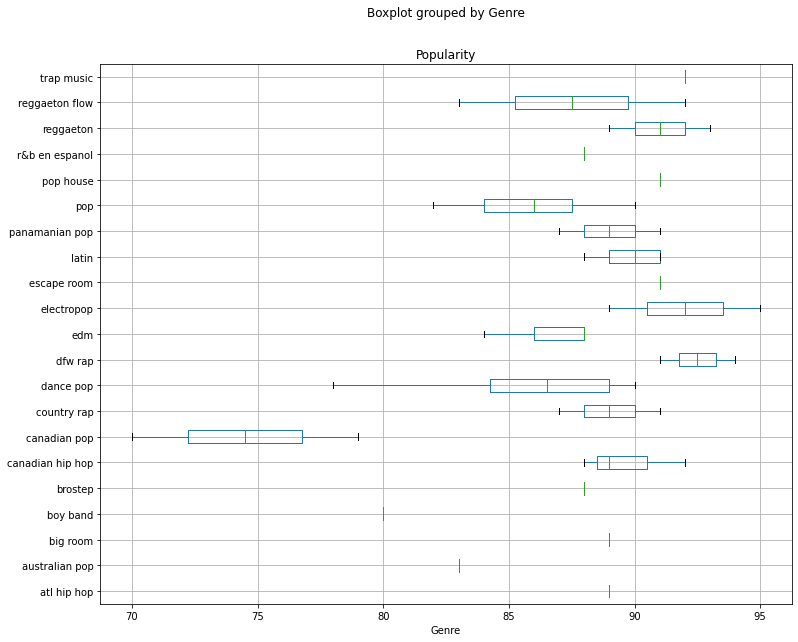

In [23]:
top50.boxplot(column= 'Popularity', by='Genre', vert=False, fontsize = 10, figsize = (12,10))

Il Dance pop è il genere la cui popolarità delle canzoni varia maggiormente, mentre si può notare che il candian pop è il genere dalla popolarità minore.





---



***Correlazione tra i Dati:***

Vediamo innanzitutto l'indice di correlazione di Pearson dei dati presenti nel dataset che stiamo analizzando:

In [24]:
top50.corr()

,Position,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
Position,1.000000,-0.259193,0.102649,0.122691,0.011914,0.270659,0.137329,-0.065844,-0.015993,-0.257506,-0.160680
Beats.Per.Minute,-0.259193,1.000000,0.043756,-0.094183,0.017016,-0.167286,-0.011586,-0.139288,-0.031450,0.557052,0.196097
Energy,0.102649,0.043756,1.000000,0.018254,0.670794,0.162768,0.438820,0.224677,-0.339892,-0.089860,-0.080295
Danceability,0.122691,-0.094183,0.018254,1.000000,0.016255,-0.149636,0.172829,-0.000185,-0.098165,-0.103472,-0.071413
Loudness..dB..,0.011914,0.017016,0.670794,0.016255,1.000000,0.258652,0.237614,0.219219,-0.138300,-0.272213,-0.043085
Liveness,0.270659,-0.167286,0.162768,-0.149636,0.258652,1.000000,0.016123,0.131782,0.021328,-0.125286,0.092564
Valence.,0.137329,-0.011586,0.438820,0.172829,0.237614,0.016123,1.000000,-0.017782,-0.052323,-0.053242,-0.317752
Length.,-0.065844,-0.139288,0.224677,-0.000185,0.219219,0.131782,-0.017782,1.000000,-0.076293,0.046755,-0.087639
Acousticness..,-0.015993,-0.031450,-0.339892,-0.098165,-0.138300,0.021328,-0.052323,-0.076293,1.000000,0.008293,-0.034684
Speechiness.,-0.257506,0.557052,-0.089860,-0.103472,-0.272213,-0.125286,-0.053242,0.046755,0.008293,1.000000,0.238553


Features correlate tra loro(considero solo valori maggiori di 0.20):
- Position -> Liveness
- BPM -> Speechiness, Popularity
- Energy -> Loudness, Valence, Length
- Danceability -> non risulta essere correlato a niente con questi criteri
- Loudness -> Energy, Liveness, Valence, Length
- Liveness -> Position, Loudness, Acousticness
- Valence -> Energy, Loudness, Popularity 

- (...ripetizione dato che sono correlate)


Features scorrelate tra loro(considero solo valori inferiori di -0.20):
- Position -> Speechiness
- BPM -> Position, Acousticness
- Energy -> Acousticness
- Danceability -> non risulta essere scorrelato a niente con questi criteri
- Loudness -> Speechiness
- Liveness -> non risulta essere scorrelato a niente con questi criteri
- Valence -> Popularity

- (...ripetizione dato che sono correlate)

Da questo possiamo trarre alcune deduzioni da analizzare:

*   La posizione in classifica sembra non essere "affetta" da nessun altra caratteristica/attributo. Solo la liveness arriva ad influire ma veramente poco.
*   Un dato curioso è tra i Beats per Minute e la Specchness : 0.557052, il quale è un valore abbastanza alto di correlazione tra i due attributi/carattersitiche.
*   L'energia di una canzone è correlata abbastanza fortemente con la sua Loudness e un po' di meno con i bpm(in questa playlist).
*   Il mood positivo della canzone è parzialmente influenzato dal numero di bpm della canzone.

In sostanza comunque i dati non sembrano essere molto correlati tra di loro, o per lo meno non sembrano esserci dati "legati" tra loro in modo rigoroso.



**T-Test tra genere Pop e Dance Pop:**

Vediamo ora come eseguire il t-test tra due generi pop(quelli più popolari e presenti in classifica) per confrontare:
1.   quale dei due ha più o meno popolarità media
2.   quale dei due ha più o meno il posizionamento 
medio alto
3.   quale dei due ha più o meno bpm medio





---



**PRECISAZIONE T-TEST**

Quando si calcola il p-value si deve confrontare con il valore di significativita' statistica. 
Quindi, se scegliete una confidenza di 0.95, dovete confrontare il p-value con 0.05. 
In modo analogo per altri valori. 
Questo vale sia per il t-test a una coda, che per il t-test a due code. 
Se il p-value e' maggiore della significativita', accetto l'ipotesi nulla.
Se il p-value e' minore, rigetto l'ipotesi nulla.

---




Dobbiamo partire dal formulare un'ipotesi nulla: 
- la popolarità media in classifca del genere pop è maggiore rispetto al dance pop, quindi l'H alternativa è che il posizionamento medio in classifica del genere pop è minore rispetto al dance pop.

In [25]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Popularity'][top50['Genre']=='pop'], popmean= top50['Popularity'][top50['Genre']=='dance pop'].mean(), alternative="less")
print(t_statistic)
print(p_value)

0.10367452745642448
0.5395969102146674


Dato che abbiamo preso un livello di confidenza di 0.95 dobbiamo accettare l'ipotesi nulla dato che il valore del p-value è notevolmente maggiore di 0.05 che è il nostro livello di significatività.

Ciò detto, comunque, possiamo vedere che dobbiamo accettare l'ipotesi nulla anche se fosse : 
- il posizionamento medio in classifica del genere pop è minore rispetto a quello del genere dance pop 

dato che otteniamo il corrispettivo valore probabilistico e quindi circa 0.46 (l'alternativa sarà dunque "greater")

In [26]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Popularity'][top50['Genre']=='pop'], popmean= top50['Popularity'][top50['Genre']=='dance pop'].mean(), alternative="greater")
print(t_statistic)
print(p_value)

0.10367452745642448
0.46040308978533256


Il caso in cui il test viene fatto con ipotesi nulla:
- il posizionamento medio in classifca del genere pop è uguale rispetto al dance pop

non specificando l'alternative nella funzione del prenderà l'alternativa di default ovvero che siano diversi.

In [27]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Popularity'][top50['Genre']=='pop'], popmean= top50['Popularity'][top50['Genre']=='dance pop'].mean())
print(t_statistic)
print(p_value)

0.10367452745642448
0.9208061795706651


Come ci aspettavamo viene un valore molto alto quindi accettiamo l'ipotesi nulla e quindi la popolarità del genere pop è molto uguale(simile) alla popolarità del dancepop.

Possiamo però notare che questo non avviene nel caso del posizionamento:

In [28]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Position'][top50['Genre']=='pop'], popmean= top50['Position'][top50['Genre']=='dance pop'].mean())
print(t_statistic)
print(p_value)

-0.6110094553802669
0.5636087300465286


In questo caso l'ipotesi nulla è: 
- il posizionamento medio del genere pop è uguale a quello del genere dance pop.

Possiamo notare come questo valore sia notevolmente inferiore rispetto al t-test precedente sulla stessa condizione analizzando la Popolarità, però bisogna accettarla comunque dato che è superiore al livello di soglia 0.05.

Andando a rifarlo con l'attributo alternative in entrambi i casi:

In [29]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Position'][top50['Genre']=='pop'], popmean= top50['Position'][top50['Genre']=='dance pop'].mean(), alternative = "greater")
print(t_statistic)
print(p_value)

-0.6110094553802669
0.7181956349767358


In [30]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Position'][top50['Genre']=='pop'], popmean= top50['Position'][top50['Genre']=='dance pop'].mean(), alternative = "less")
print(t_statistic)
print(p_value)

-0.6110094553802669
0.2818043650232643


Devo accettare le ipotesi nulle in tutti e due i casi analizzando i p-value ottenuti. 

Possiamo però notare come il posizionamento medio in classifica del genere pop sia maggiore rispetto a quello del genere dancepop confrontando proprio questi valori dei p-value ottenuti dai due t-test.


**T-Test tra genere Pop e Canadian Pop**

Incuriosisce la differenza di varianza di popolarità e di posizionamento dei generi pop e canadian pop nonostante appunto risultino sotto la sovracategoria pop.. Analizziamo la correlazione tra i due generi e i valori dei loro attributi estraendo informazioni interessanti.


***- Loudness:***

In [31]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Loudness..dB..'][top50['Genre']=='pop'], popmean= top50['Loudness..dB..'][top50['Genre']=='canadian pop'].mean(), alternative = 'greater')
print(t_statistic)
print(p_value)

-2.1213203435596424
0.9609296252943922


Il t-test riporta un p-value notevolmente maggiore del livello di sigificatività 0.05 e quindi accettiamo l'ipotesi nulla:
- La potenza delle canzoni del genere pop è minore rispetto a quella del genere canadian pop, dato che il valore ottenuto dal p-value è notevolmente maggiore di 0.05.

Ciò si può apprezzare meglio dal controesempio utilizzando l'alternativa less:

In [32]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Loudness..dB..'][top50['Genre']=='pop'], popmean= top50['Loudness..dB..'][top50['Genre']=='canadian pop'].mean(), alternative = 'less')
print(t_statistic)
print(p_value)

-2.1213203435596424
0.03907037470560787


In questo caso, come ci aspettavamo, otteniamo un valore del p-value inferiore al livello di significatività e quindi scartiamo l'ipotesi nulla sopra riportata a favore dell'ipotesi alternativa:
- La potenza delle canzoni del genere pop è maggiore rispetto a quella del genere canadian pop, dato che il valore ottenuto dal p-value è minore di 0.05.

***- Liveness:***

In [33]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Liveness'][top50['Genre']=='pop'], popmean= top50['Liveness'][top50['Genre']=='canadian pop'].mean(), alternative = 'greater')
print(t_statistic)
print(p_value)

0.4086347063482532
0.3484960847425449


Confermiamo l'ipotesi nulla:
- La liveness delle canzoni del genere pop è minore rispetto a quella del genere canadian pop, dato che il valore ottenuto dal p-value è notevolmente maggiore di 0.05.

Anche se eseguendo il t-test complementare:

In [34]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Liveness'][top50['Genre']=='pop'], popmean= top50['Liveness'][top50['Genre']=='canadian pop'].mean(), alternative = 'less')
print(t_statistic)
print(p_value)

0.4086347063482532
0.6515039152574551


Si nota che si ottiene un valore del p-vlaue di 0.65 con l'alternativa greater e che quindi dobbiamo confermare l'ipotesi nulla:
- La liveness delle canzoni del genere pop è maggiore rispetto a quella del genere canadian pop, dato che il valore ottenuto dal p-value è notevolmente maggiore di 0.05.

Possiamo quindi concludere che questa affermazione è confermata maggiormente rispetto alla precedente proprio confrontando i valori dei p-value ottenuti con i t-test eseguiti.

Quindi si può dire complessivamente che la Liveness delle canzoni del genere pop è maggiore rispetto a quella del genere canadian pop. 

Ragioneremo così di conseguenza per tutti gli altri t-test con valori simili.

***- BPM:***

In [35]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Beats.Per.Minute'][top50['Genre']=='pop'], popmean= top50['Beats.Per.Minute'][top50['Genre']=='canadian pop'].mean(), alternative = 'greater')
print(t_statistic)
print(p_value)

-0.7651969130815115
0.7634156949583331


I BPM è sono notevolmente maggiori nel genere canadian pop rispetto al pop, siccome viene confermata l'ipotesi nulla:
- i BPM del genere pop sono minori rispetto a quelli del genere canadian pop, dato che il valore ottenuto dal p-value è notevolmente maggiore di 0.05.

***- Energy:***

In [36]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Energy'][top50['Genre']=='pop'], popmean= top50['Energy'][top50['Genre']=='canadian pop'].mean(), alternative = 'greater')
print(t_statistic)
print(p_value)

-0.8236109703919069
0.779169615459225


L'Energia è notevolmente maggiore nel genere canadian pop rispetto al pop, siccome viene confermata l'ipotesi nulla:
- L' energia delle canzoni del genere pop è minore rispetto a quella del genere canadian pop, dato che il valore ottenuto dal p-value è notevolmente maggiore di 0.05.

***- Valence:***

In [37]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Valence.'][top50['Genre']=='pop'], popmean= top50['Valence.'][top50['Genre']=='canadian pop'].mean(), alternative = 'greater')
print(t_statistic)
print(p_value)

-2.716872346805644
0.9826065130631729


In [38]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Valence.'][top50['Genre']=='pop'], popmean= top50['Valence.'][top50['Genre']=='canadian pop'].mean(), alternative = 'less')
print(t_statistic)
print(p_value)

-2.716872346805644
0.017393486936827105


La "valenza" della canzone è notevolmente maggiore nel genere canadian pop rispetto al pop.

In questo caso possiamo apprezzare maggiormente con le due alternative questa conclusione:
- con l'alternativa greater accettiamo l'ipotesi nulla: 
    - la valenza del genere pop è minore di quella del genere canadian pop dato che il p-value ottenuto con il t-test è notevolmente maggiore di 0.05.
- con l'alternativa less dobbiamo scartare l'ipotesi nulla: 
  - la valenza del genere pop è maggiore di quella del genere canadian pop, dato che il p-value ottenuto con il t-test è inferiore di 0.05.

***- Lunghezza:***

In [39]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Length.'][top50['Genre']=='pop'],popmean= top50['Length.'][top50['Genre']=='canadian pop'].mean(), alternative = 'less')
print(t_statistic)
print(p_value)

0.6308601579817562
0.7243050674426822


Risulta che le canzoni del genere pop siano più lunghe mediamente di quelle del genere canadian pop, siccome viene confermata l'ipotesi nulla:
- La lunghezza media delle canzoni del genere pop è maggiore rispetto a quella del genere canadian pop, dato che il valore ottenuto dal p-value è notevolmente maggiore di 0.05.

***- Acousticness:***

In [40]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Acousticness..'][top50['Genre']=='pop'], popmean= top50['Acousticness..'][top50['Genre']=='canadian pop'].mean(), alternative = 'greater')
print(t_statistic)
print(p_value)

-0.5558876090713705
0.7008053704370074


La "acusticità" della canzone è notevolmente maggiore nel genere canadian pop rispetto al pop, siccome viene confermata l'ipotesi nulla:
- L'acusticità media delle canzoni del genere pop è minore rispetto a quella del genere canadian pop, dato che il valore ottenuto dal p-value è notevolmente maggiore di 0.05.

***- Parole differenti usate all'interno della canzone(Speechness):***

In [41]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Speechiness.'][top50['Genre']=='pop'], popmean= top50['Speechiness.'][top50['Genre']=='canadian pop'].mean(), alternative = 'greater')
print(t_statistic)
print(p_value)

2.1852990447290317
0.03576840836614951


La media delle parole differenti usate all'interno della canzone è notevolmente minore nel genere canadian pop rispetto al pop, siccome dobbiamo rigettare l'ipotesi nulla:
- La media delle parole differenti usate all'interno delle canzoni del genere pop è minore rispetto a quella del genere canadian pop, dato che il valore ottenuto dal p-value è minore di 0.05.

***Divagazione:*** 

Che sia proprio questa l'arma vincente del genere pop rispetto al canadian pop?

Il "saper usare" più termini ma riuscire a fare comunque hit da posti più alti in classifica nella top50?

In [42]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Speechiness.'][top50['Genre']=='pop'], popmean= top50['Speechiness.'][top50['Genre']=='canadian pop'].mean(), alternative = 'less')
print(t_statistic)
print(p_value)

2.1852990447290317
0.9642315916338505



Il contro-esempio sopra riportato(t-test con alternative='less') ci mostra ancora meglio quanto detto prima, confermiamo l'ipotesi nulla:
- La media delle parole differenti usate all'interno delle canzoni del genere pop è maggiore rispetto a quella del genere canadian pop, dato che il valore ottenuto dal p-value è notevolmente maggiore di 0.05.

***ANALISI MACRO GENERI***

Raggruppo ora i generi in maxi_generi: es. canadian pop viene raggruppato nel pop e cosi via..

In [43]:
genere_pop = top50[top50['Genre']=='pop']
genere_canadian_pop = top50[top50['Genre']=='canadian pop']
genere_panamanian = top50[top50['Genre']=='panamanian pop']
genere_australian_pop = top50[top50['Genre']=='australian pop']
genere_boy_band = top50[top50['Genre']=='boy band']
maxi_genere_pop = pd.concat([genere_pop,genere_canadian_pop,genere_panamanian,genere_australian_pop,genere_boy_band],axis=0,keys=['pop', 'pop', 'pop', 'pop','pop'], names=['Genere',None]) #, ignore_index=True
#print(len(maxi_genere_pop))
genere_pop_house = top50[top50['Genre']=='pop house']
genere_electropop = top50[top50['Genre']=='electropop']
genere_dance_pop = top50[top50['Genre']=='dance pop']
genere_edm =  top50[top50['Genre']=='edm']
genere_brostep =  top50[top50['Genre']=='brostep']
maxi_genere_dance = pd.concat([genere_pop_house,genere_electropop,genere_dance_pop,genere_edm,genere_brostep],axis=0,keys=['dance', 'dance', 'dance', 'dance','dance'], names=['Genere',None])
#print(len(maxi_genere_dance))
genere_reggaeton = top50[top50['Genre']=='reggaeton']
genere_latin = top50[top50['Genre']=='latin']
genere_reggaeton_flow = top50[top50['Genre']=='reggaeton flow']
genere_r_and_b = top50[top50['Genre']=='r&b en espanol']
maxi_genere_reggaeton = pd.concat([genere_reggaeton,genere_reggaeton_flow,genere_latin,genere_r_and_b],axis=0,keys=['reggaeton', 'reggaeton', 'reggaeton', 'reggaeton'], names=['Genere',None])
#print(len(maxi_genere_reggaeton))
genere_trap = top50[top50['Genre']=='trap music']
genere_country_rap = top50[top50['Genre']=='country rap']
genere_dfw_rap = top50[top50['Genre']=='dfw rap']
maxi_genere_rap = pd.concat([genere_trap,genere_country_rap,genere_dfw_rap],axis=0,keys=['rap', 'rap', 'rap'], names=['Genere',None])
#print(len(maxi_genere_rap))
genere_atl_hip_hop = top50[top50['Genre']=='atl hip hop']
genere_canadian_hip_hop = top50[top50['Genre']=='canadian hip hop']
maxi_genere_disco_hip_hop = pd.concat([genere_atl_hip_hop,genere_canadian_hip_hop],axis=0,keys=['hip hop', 'hip hop'], names=['Genere',None])
#print(len(maxi_genere_disco_hip_hop))
genere_big_room = top50[top50['Genre']=='big room']
genere_escape_room = top50[top50['Genre']=='escape room']
maxi_genere_room = pd.concat([genere_big_room,genere_escape_room],axis=0,keys=['room', 'room'], names=['Genere',None])
#print(len(maxi_genere_room))
maxi_all = pd.concat([maxi_genere_pop,maxi_genere_dance,maxi_genere_reggaeton,maxi_genere_rap,maxi_genere_disco_hip_hop,maxi_genere_room],axis=0)
#print(len(maxi_all))


ora ho tutti i generi raggruppati in macro generi, andiamo ad estrapolarne dei dati:

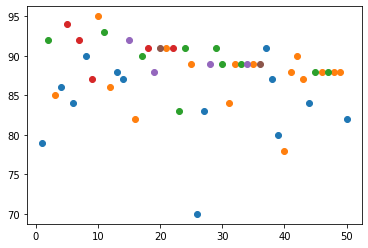

In [44]:
#maxi_genere_pop.plot(kind = 'bar',title = 'Numero Canzoni x Genere', fontsize = 10, figsize = (15,5))
#maxi_all.head(50)
plt.scatter(maxi_genere_pop['Position'],maxi_genere_pop['Popularity'])
plt.scatter(maxi_genere_dance['Position'],maxi_genere_dance['Popularity'])
plt.scatter(maxi_genere_reggaeton['Position'],maxi_genere_reggaeton['Popularity'])
plt.scatter(maxi_genere_rap['Position'],maxi_genere_rap['Popularity'])
plt.scatter(maxi_genere_disco_hip_hop['Position'],maxi_genere_disco_hip_hop['Popularity'])
plt.scatter(maxi_genere_room['Position'],maxi_genere_room['Popularity'])

Proviamo ora ad effettuare i t-test che prima abbiamo usato per confrontare due generi dello stesso macro-genere per confronatre appunto questi macro-generi ed estrapolarne informazioni interessanti.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


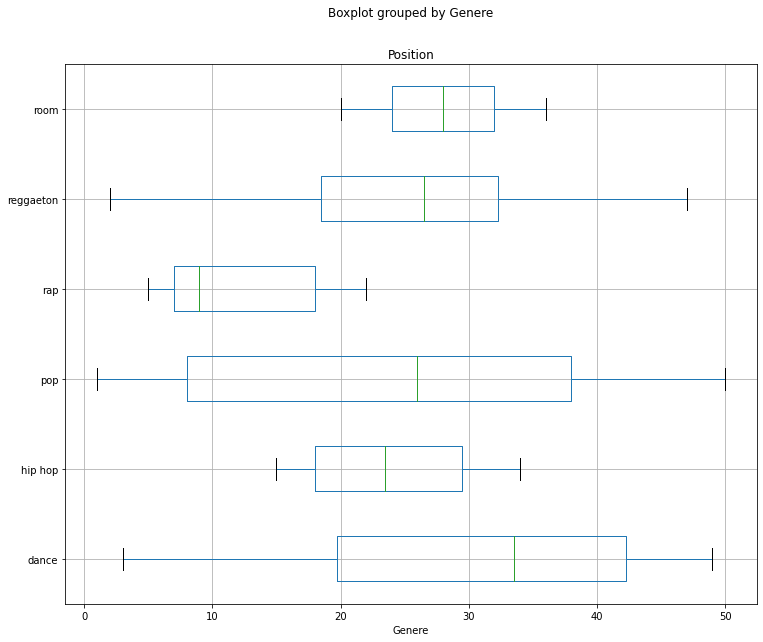

In [45]:
maxi_all.boxplot(column= 'Position', by='Genere', vert=False, fontsize = 10, figsize = (12,10))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


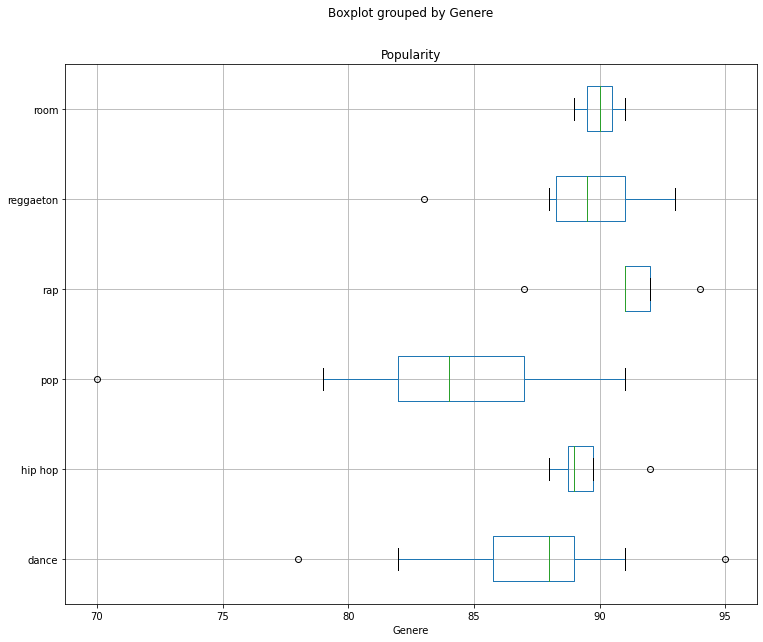

In [46]:
maxi_all.boxplot(column= 'Popularity', by='Genere', vert=False, fontsize = 10, figsize = (12,10))

Esaminando questi due box plot simili a quelli effettuati su tutto il dataset direttamente,  si evince che il macro genere pop, dance e reggaeton hanno varianza di posizionamento su tutta la classifica.

Il genere rap domina la classifica sia dal punto di vista della popolarità mediana del macro genere rap rispetto a quella degli altri macrogeneri presenti in classifica dato che i posizionamenti sono più altri rispetto ad esempio ai macro generi sopra elencati.


Verifichiamo quanto abbiamo dedotto da questi grafici sopra riportati eseguendo dei t-test di confronto tra i macro generi sopra nominati

Partiamo analizzando i due macrogeneri piu presenti all'interno della top50 che stiamo analizzando:

Verifichiamo ora se possiamo accettare la seguente ipotesi nulla:

- La popolarità media del macro genere pop è maggiore a quella del macro genere dance

In [47]:
t_statistic, p_value = stats.ttest_1samp(a= maxi_genere_pop['Popularity'], popmean= maxi_genere_dance['Popularity'].mean(), alternative='less')
print(t_statistic)
print(p_value)

-2.2160901182261306
0.023382981648638865


Il t-test effettuato ha riportato un p-value minore del valore di significatività e quindi bisogna rigettare l'ipotesi nulla e quindi concludere che la popolarità media del macro genere dance è maggiore rispetto a quella del macro genere pop come si poteva notare direttamente nel box plot sopra riportato.



In [48]:
t_statistic, p_value = stats.ttest_1samp(a= maxi_genere_pop['Popularity'], popmean= maxi_genere_rap['Popularity'].mean(), alternative='less')
print(t_statistic)
print(p_value)

-4.627070431246613
0.0002915179096207425


Con questo t-test sopra riportato invece dimostriamo come la popolarità del macro genere rap sia maggiore rispetto a quella del macro genere pop che presenta la canzone posizionata al 1°posto in classifica. Questo dato perchè ottengo un valore del p-value ulteriormente piccolo rispetto a quello del t-test precedente ed analogamente, possiamo dire, con maggiore "forza" rispetto a prima, che il macro genere rap presenta canzoni mediamente più popolari in classifica rispetto al macro genere pop.

*Ci sono caratteristiche/features che rendono "vincente" il macro genere rap rispetto agli altri macro generi?*

Andiamo proprio a vedere il perchè di questa dominanza di questo macro genere rap rispetto a quello pop per capire in cosa riesce "ad arrivare di più alla gente" e ad ottenere sia un posizionamento medio più alto sia una popolarità maggiore: potremmo anche fare ciò visualizzando ulteriori box plot per confrontare direttamente il rap con tutti gli altri macrogenere, colonna per colonna e verificare con t-test le conclusioni che estrapoleramo:

***- BPM:***

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


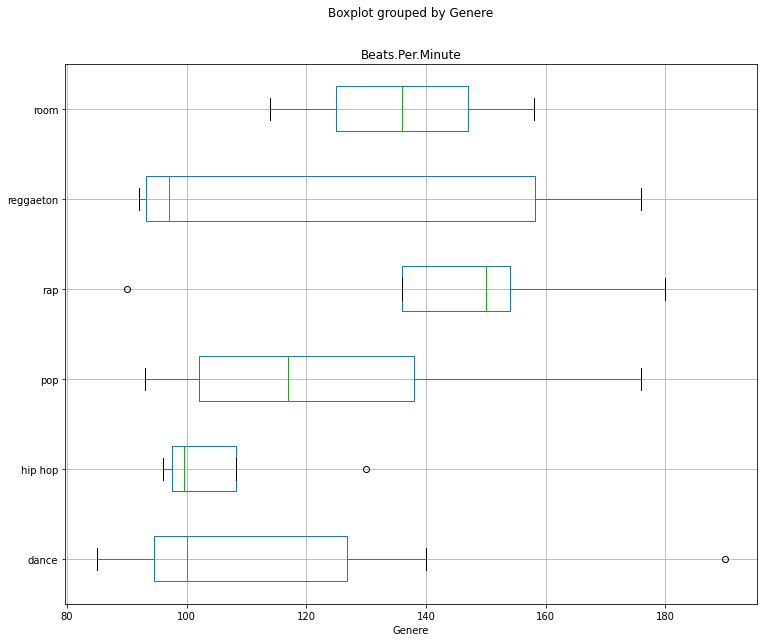

In [49]:
maxi_all.boxplot(column= 'Beats.Per.Minute', by='Genere', vert=False, fontsize = 10, figsize = (12,10))

Si riesce a vedere come il macro genere rap abbia i bpm medi maggiori rispetto a tutti gli altri macro generi.

***- Energy, Danceability e Valence:***

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


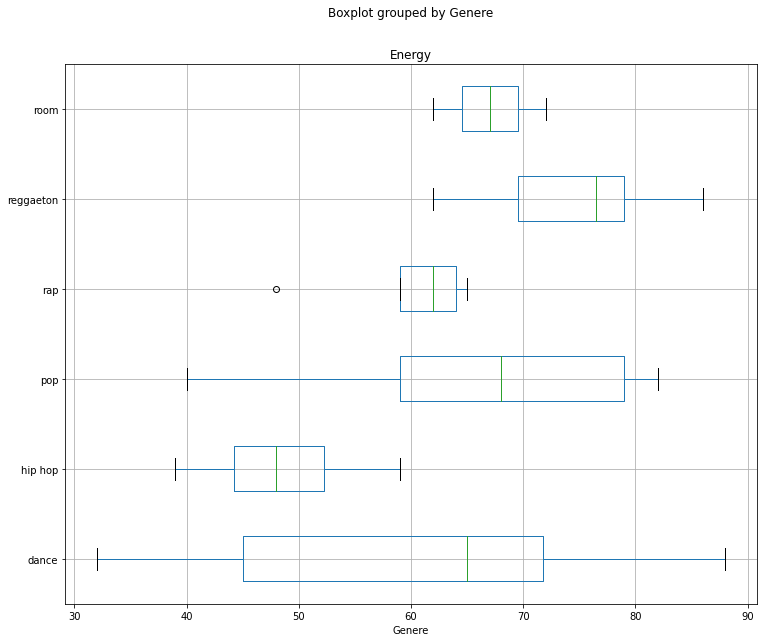

In [50]:
maxi_all.boxplot(column= 'Energy', by='Genere', vert=False, fontsize = 10, figsize = (12,10))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


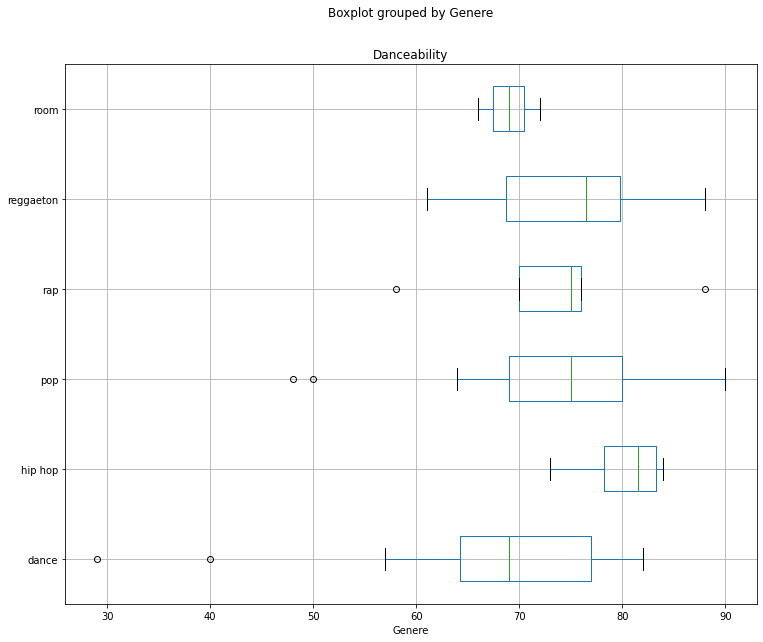

In [51]:
maxi_all.boxplot(column= 'Danceability', by='Genere', vert=False, fontsize = 10, figsize = (12,10))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


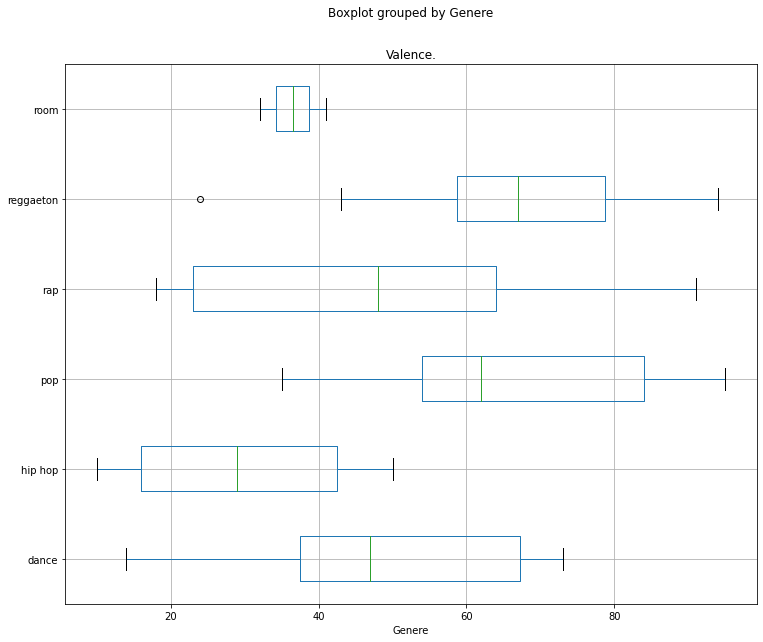

In [52]:
maxi_all.boxplot(column= 'Valence.', by='Genere', vert=False, fontsize = 10, figsize = (12,10))

Come si evince da questi grafici il macro genere rap non si evidenzia dagli altri rispetto all'energia, alla "danzabilità" della canzone e alla "valenza" media delle canzoni.

Si nota come il macro genere rap abbia una valenza mediana media rispetto ai valori di tutti i macro generi(si piazza nel mezzo).

***- Lenght:***

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


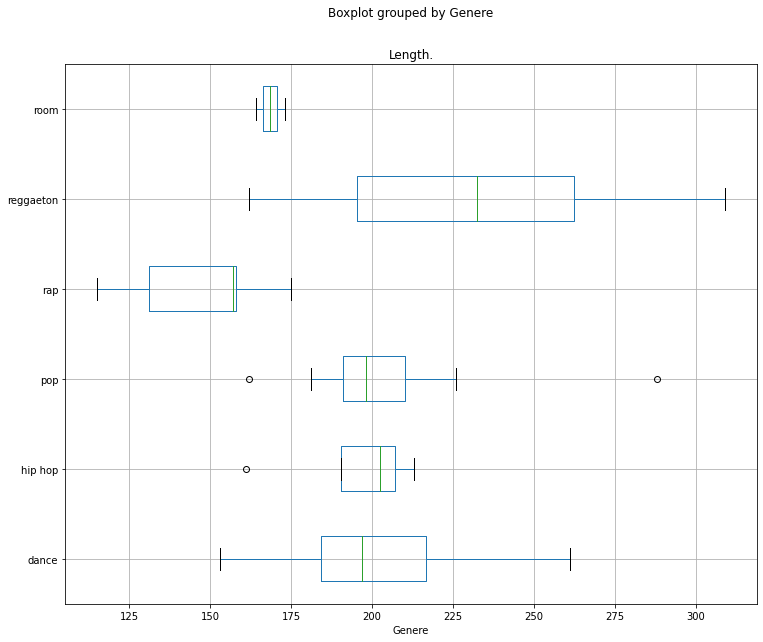

In [53]:
maxi_all.boxplot(column= 'Length.', by='Genere', vert=False, fontsize = 10, figsize = (12,10))

Si riesce a notare chiaramente dal grafico sopra riportato come il rap sia il macro genere con la durate delle canzoni minori.

Concludendo, il macro genere rap si distingue dagli altri per:

- canzoni più brevi
- bpm

Saranno mica questi i fattori che rendono le canzoni appartenenti al macro genere esaminato più popolari rispetto agli altri generi?

***APPRENDIMENTO SUPERVISIONATO***

Quale modello di machine learning possiamo utilizzare per stimare una funzione che preveda la popolarità (quale caratteristica la indica?) in funzione di uno o piu' degli altri descrittori a disposizione?

Dobbiamo determinare una relazione tra predittori e una variabile di risposta (che possiamo considerare continua). 

Proviamo ad utilizzare un modello di **Regressione lineare**. 

Cominciamo considerando soltanto la caratteristica *Beats.Per.Minute*. 
 * Usiamo una tecnica di visualizzazione opportuna per verificare se esiste una qualche relazione tra Speechiness e Popolarità(Speechiness è la feature che risulta essere più correlata alla popolarità).



In [54]:
maxi_all[['Popularity', 'Speechiness.']].corr()

,Popularity,Speechiness.
Popularity,1.000000,0.238553
Speechiness.,0.238553,1.000000


I dati non sono correlati fortemente quindi il machine lerning risente di questo ed otterremo predizioni meno precise in questo caso.

Proviamo comunque ad implementare e visualizzare un modello di regressione lineare tra queste due features.

intercept: [84.22779436]
coefficient: [[0.19869223]]


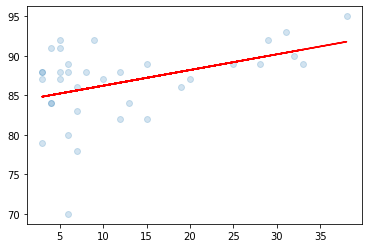

In [55]:
features_x = ['Speechiness.']
features_y = ['Popularity']
 
x = maxi_all[features_x]
y = maxi_all[features_y]
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.3)

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
lin_reg = regressor.fit(X_train, y_train)

print('intercept:', lin_reg.intercept_)
print('coefficient:', lin_reg.coef_)

plt.scatter(X_train, y_train, alpha = 0.2)

y_hat = X_train*lin_reg.coef_ + lin_reg.intercept_
plt.plot(X_train, y_hat, color='r')

Questo problema di regressione lineare risulta essere inefficace, proviamo con un problema di classificazione e proviamo quindi a predirre la popolarità media di una data canzone.

**APPRENDIMENTO NON SUPERVISIONATO**

Questo machine learning servirà per risponere alle seguenti domande:

- è possibile predire/assegnare un genere e macro-genere di/ad una canzone a seconda degli attributi/caratteristiche della canzone?

- è possibile predire la popolarità di una canzone a seconda dei suoi attributi/caratteristiche?


Definiamo la funzione della silhouette per definirci con esattezza il numero di cluster da passare in input al KMeans per ottenere un risultato migliore.

In [56]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn import preprocessing
import random

def silhouette(x):
    silhouette_avg = []
    for i in range(2, 22):
        kmeans = KMeans(n_clusters = i, max_iter = 20, random_state = 0)
        cluster_labels = kmeans.fit_predict(x)
        silhouette_avg.append(silhouette_score(x, cluster_labels))

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters

    plt.plot(range(2, 22), silhouette_avg,'-o')
    plt.title('The silhouette method')
    plt.xlabel('Number of clusters')
    plt.ylabel('silhouette coefficient') #within cluster sum of squares
    plt.show()

Andiamo a prenderci tutte le features a nostra disposizione per cercare di rispondere alla prima domanda e quindi di predirre il genere di una canzone a seconda dei suoi attributi.

In [57]:
features = ['Beats.Per.Minute','Energy','Danceability','Loudness..dB..','Liveness','Valence.','Length.','Acousticness..','Speechiness.','Popularity']
X=maxi_all[features]
X = np.asarray(X)

In [58]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

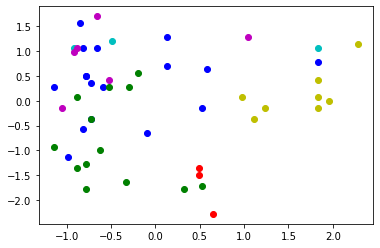

In [59]:
color = ['r','b','y','g','c','m','k','#877666']

kmeans=KMeans(n_clusters=6, random_state=0).fit(X)
y=kmeans.labels_
for i in range(0,6):
    plt.scatter(X[np.where(y==i),0],X[np.where(y==i),1], color = color[i])

Provando ad effettuare il problema di classficazione utilizzando 6 cluster, tanti quanti i macro-generi, non viene il risultato sperato e/o comunque i cluster risultano organizzati in modo non correlato.

Andiamo quindi a vedere con la silhuouette se il numero di cluster utilizzato era il più efficente o meno:

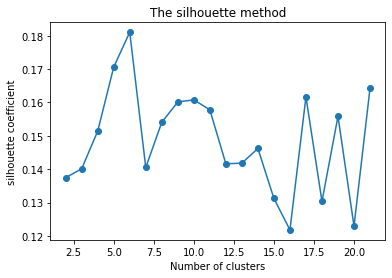

In [60]:
silhouette(X)

La scelta dei cluster utilizzati è risultata la più efficente.

Ora non ci resta altro che rendere quantitativo l'attributo del genere per visualizzare il box plot che ci restituisca visivamente come in base ai cluster a cui una canzone viene assegnata "ottenga un genere di appartenza".

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


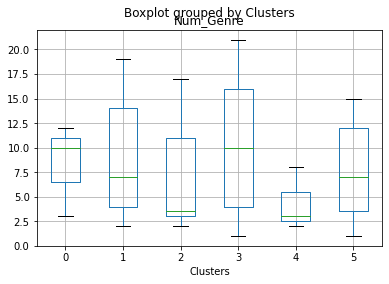

In [61]:
tutti_generi_numerico = [1,2,3,4,5,4,6,4,7,8,2,3,4,9,10,3,11,5,10,12,13,7,14,11,8,1,15,1,11,11,16,3,2,17,3,18,9,4,19,3,16,3,3,4,20,21,11,21,16,4]
#1 = canadian pop
#2 = reggaeton
#3 = dance pop
#4 = pop
#5 = dfw rap
#6 = trap
#7 = country rap
#8 = electropop
#9 = panamanian pop
#10 = canadian hip hop
#11 = latin
#12 = escape room
#13 = pop house
#14 = reggaeton flow
#15 = australian pop
#16 = edm
#17 = atl hip hop
#18 = big room
#19 = boy band
#20 = r&b espanol
#21 = brostep
maxi_all["Num_Genre"] = tutti_generi_numerico
maxi_all["Clusters"]=kmeans.predict(X)
maxi_all.boxplot(column='Num_Genre',by='Clusters')

Da questo box-plot quindi riusciamo a visualizzare quello sopra descritto e quindi ad ottenere un genere (con non troppa precisione dato il basso coefficente di silhouette ottenuto) in base agli attributi della canzone.

Andiamo ora a rendere quantitativo l'attributo del macro genere dalla canzone per poter assegnare anche quello con una predizione in maniera analoga alla precedente.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


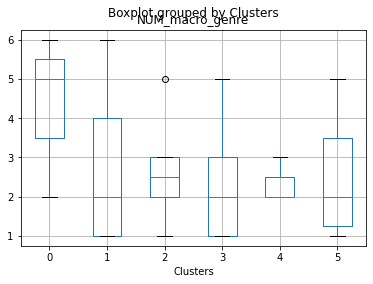

In [62]:
macro_generi_numerico = [1,3,1,1,4,1,4,1,4,2,3,2,1,1,5,2,3,4,5,6,2,4,3,3,2,1,1,5,3,3,2,2,3,5,2,6,1,1,1,2,2,2,2,1,3,2,3,2,2,1]
#1 = pop
#2 = dance
#3 = reggaeton
#4 = rap
#5 = hip hop
#6 = room
maxi_all['NUM_macro_genre'] = macro_generi_numerico
maxi_all["Clusters"]=kmeans.predict(X)
maxi_all.boxplot(column='NUM_macro_genre',by='Clusters')

Riusciamo anche in questo caso ad assegnare i macro generi di appartenenza di una canzone con determinate caratteristiche.

Proviamo ora a rispondere alla seconda domanda, ovvero che popolarità avrà una canzone che arriva utilizzando tutte le features a nostra disposizione.

In [63]:
features = ['Beats.Per.Minute','Energy','Danceability','Loudness..dB..','Liveness','Valence.','Length.','Acousticness..','Speechiness.','Num_Genre','NUM_macro_genre']
X=maxi_all[features]
X = np.asarray(X)
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

Riproviamo sempre con l'utilizzo di 6 cluster che corrisponde al numero di macro generi delle analisi precedenti.

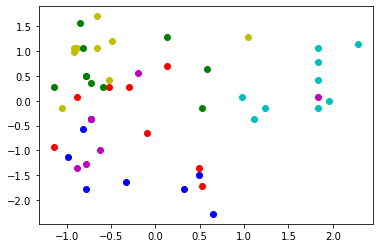

In [64]:
kmeans=KMeans(n_clusters=6, random_state=0).fit(X)
y=kmeans.labels_
for i in range(0,6):
    plt.scatter(X[np.where(y==i),0],X[np.where(y==i),1], color = color[i])

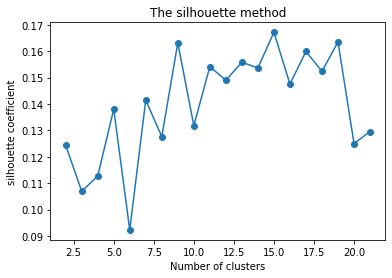

In [65]:
silhouette(X)

Analizzando la silhouette la prima cosa che risalta è il bassissimo livello di silhouette ottenuto anche in caso di utilizzo del numero consigliato di cluster.

I risultati che si otterranno saranno quindi approssimativi.

Andiamo comunque ad utilizzare il numero di cluster consigliato, ovvero 14.

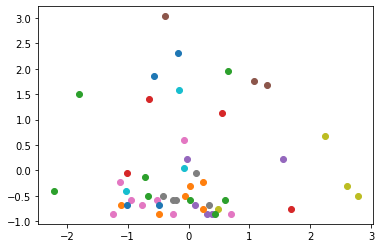

In [66]:
kmeans=KMeans(n_clusters=14, random_state=0).fit(X)
y=kmeans.labels_
for i in range(0,14):
    plt.scatter(X[np.where(y==i),6],X[np.where(y==i),8])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


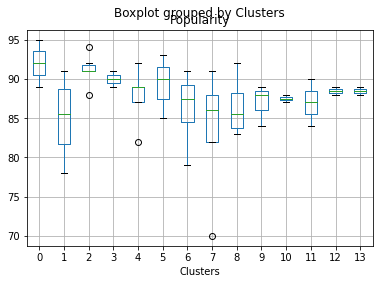

In [67]:
maxi_all["Clusters"]=kmeans.predict(X)
maxi_all.boxplot(column='Popularity',by='Clusters')

Come si può vedere un risultato si riesce a visualizzare ma non si può comuqneu considerare un efficente risoluzione di questo problema di classificazione dato anche l'elevato numero di cluster.

Questo comunque non ci stupisce proprio grazie all'analisi dei dati:
- i dati non risultano essere correlati/scorrelati eccessivamente l'uno dall'altro, quindi la suddivisione in cluster non risulta efficente se effettuata su un gruppo di features cosi elevato.
- il grafico della silhouette mostra subito come sia basso il coefficente di silhouette ottenuto nel tentare di risolvere questo problema utilizzando la maggior parte delle feature.

Andiamo quindi a provare a dimiuire le features coinvolte cercando di prendere quelle che risultano essere più correlate tra loro, andando quindi ad utilizzare anche i dati che abbiamo ricavato dall'inizio di quest'analisi sul dataset contenente la top50 globale di spotify(proviamo sempre ad effettuare una prova, prima di visualizzare la silhouette, con 6 cluster(sempre il numero di macro_generi delle analisi precedenti)).

In [68]:
correlated_features_to_popularity = ['Beats.Per.Minute','Liveness','Speechiness.','Valence.'] 
X = maxi_all[correlated_features_to_popularity]
X = np.asarray(X)
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

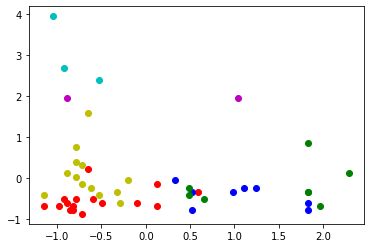

In [69]:
kmeans=KMeans(n_clusters=6, random_state=0).fit(X)
y=kmeans.labels_
for i in range(0,6):
    plt.scatter(X[np.where(y==i),0],X[np.where(y==i),1], color = color[i])

Ora verifichiamo se il numero di cluster utilizzato è stato sensato(sembrerebbe di no, analizzando il grafico sopra riportato potrebbe essere pià sensato l'utilizzo di 2/3/4 cluster) con l'utilizzo della silhouette.

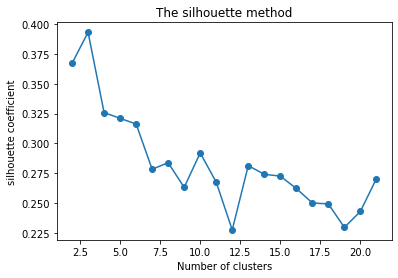

In [70]:
silhouette(X)

Grazie a questa visualizzazione della silhouette si evincono le seguenti informazioni: 
- l'utilizzo di 3 cluster restituisca un coefficente di silhouette maggiore e quindi sia migliore dei 6 precedentemente usati(non è ancora sufficentemente alto per garantire la corretta risoluzione del problema di classificazione).
-l'utilizzo di 20 cluster in questo caso avrebbe restituito cluster completamente privi di informazioni e di utilità(simili a quelli venuti fuori precedentemente).

Rieffettuando quindi il KMeans con n° di cluster = 3, otteniamo 3 gruppi ben distinti anche se alcuni punti ancora si intersecano. 

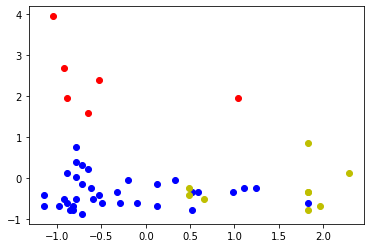

In [71]:
kmeans=KMeans(n_clusters=3, random_state=0).fit(X)
y=kmeans.labels_
for i in range(0,3):
    plt.scatter(X[np.where(y==i),0],X[np.where(y==i),1], color = color[i])

I punti risultano comunque intrecciarsi probabilmente dato dal fatto è una scelta casuale ma non troppo quella dei centroidi dei cluster.

Visualizziamo ora i box plot per visualizzare come sia migiorato rispetto all'uso di tutte le features come in precedenza(dato che erano poco correlate con la popolarità) e all'uso delle sole features correlate alla popolarità per ottenere appunto una predizione di questa in base a queste caratteristiche analizzate.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


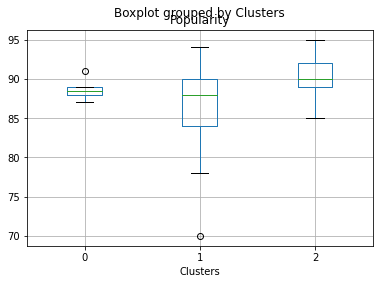

In [72]:
maxi_all["Clusters"]=kmeans.predict(X)
maxi_all.boxplot(column='Popularity',by='Clusters')

Siamo riusciti così a separare i nostri dati rispetto a questa variabile di popolarità per poter essere restituita/assegnata a seconda del cluster al quale la canzone con quelle determinate features viene associata.

**Studio della correlazione per predizione macro genere**



Andando ad analizzare i singoli macro generi e la correlazione dei dati al loro interno ci aspettiamo di ottenere correlazioni più accurate(valori più alti(negativi e/o positivi che siano)) e quindi così provare a riformulare nel modo analogo al precedente il problema di classificazione cercando di clusterizzare per riuscire a:
- prevedere con maggior successo la popolarità di una canzone che vuole essere lanciata e che appartiene ad un certo macro_genere(prima veniva fatto senza questa limitazione). 

Prendiamo in esame i tre macro_generi più presenti in classificca, con il miglior piazzamento medio e con la miglior popolarità media che, grazie agli studi precedentemente effettuati, sono risultati essere:
- rap
- dance
- pop

Partendo con il macro genere rap andiamo a visualizzare la correlazione delle caratteristiche delle canzoni appartenenti a questo macro genere.

In [73]:
maxi_genere_rap.corr()

,Position,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
Position,1.000000,-0.428444,-0.700866,0.117101,-0.544207,0.103864,0.610904,-0.566017,0.432371,-0.434681,-0.185617
Beats.Per.Minute,-0.428444,1.000000,0.868827,-0.226612,0.134963,0.213027,-0.882463,-0.441950,-0.658215,0.720327,0.254496
Energy,-0.700866,0.868827,1.000000,-0.231762,0.438923,0.425642,-0.884150,-0.005475,-0.614006,0.470422,0.156836
Danceability,0.117101,-0.226612,-0.231762,1.000000,-0.793182,-0.193199,0.587026,-0.167118,-0.562058,0.165762,-0.930568
Loudness..dB..,-0.544207,0.134963,0.438923,-0.793182,1.000000,0.324967,-0.571800,0.650243,0.385884,-0.274290,0.657794
Liveness,0.103864,0.213027,0.425642,-0.193199,0.324967,1.000000,-0.228909,-0.046040,0.003453,-0.481755,-0.162866
Valence.,0.610904,-0.882463,-0.884150,0.587026,-0.571800,-0.228909,1.000000,0.066768,0.336410,-0.515328,-0.582914
Length.,-0.566017,-0.441950,-0.005475,-0.167118,0.650243,-0.046040,0.066768,1.000000,0.338240,-0.407180,0.114881
Acousticness..,0.432371,-0.658215,-0.614006,-0.562058,0.385884,0.003453,0.336410,0.338240,1.000000,-0.744522,0.477082
Speechiness.,-0.434681,0.720327,0.470422,0.165762,-0.274290,-0.481755,-0.515328,-0.407180,-0.744522,1.000000,0.100237


Estrapoliamo subito le features che sono più correlate alla Popolarità:
- BPM, Loudness, Acousticness 

Estrapoliamo subito le features che sono più scorrelate alla Popolarità:forte per provare a prevedere comunque:
- Danceability, Valence

In [74]:
correlated_features_to_popularity_for_rap = ['Beats.Per.Minute','Loudness..dB..','Acousticness..'] 
scorrelated_features_to_popularity_for_rap = ['Danceability','Valence.'] 
all_correlated_features_to_popularity = ['Beats.Per.Minute','Loudness..dB..','Acousticness..','Danceability','Valence.']

Andiamo ad eseguire quindi il fitting dei dati come in precedenza in base alle features che si vogliono utilizzare.

In [75]:
#correlate positivamente
X = maxi_genere_rap[correlated_features_to_popularity_for_rap]
X = np.asarray(X)
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

#correlate negativamete
Z = maxi_genere_rap[scorrelated_features_to_popularity_for_rap]
Z = np.asarray(Z)
scaler = preprocessing.StandardScaler().fit(Z)
Z = scaler.transform(Z)

#correlazione sia negativa che postivia
A = maxi_genere_rap[all_correlated_features_to_popularity]
A = np.asarray(A)
scaler = preprocessing.StandardScaler().fit(A)
A = scaler.transform(A)

Utilizziamo due cluster(il minimo) date le poche canzoni presenti nei macro generi in analisi.

Con le features correlate positivamente:

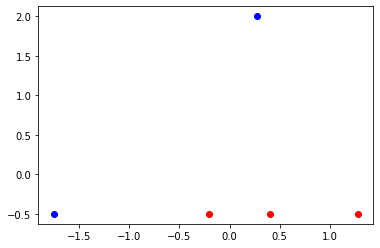

In [76]:
kmeans=KMeans(n_clusters=2, random_state=0).fit(X)
y=kmeans.labels_
for i in range(0,2):
    plt.scatter(X[np.where(y==i),0],X[np.where(y==i),1], color = color[i])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


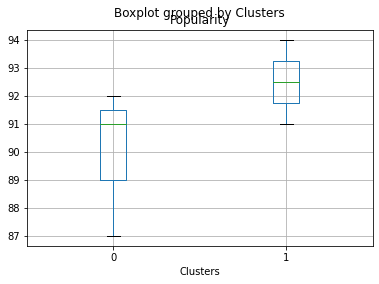

In [77]:
maxi_genere_rap["Clusters"]=kmeans.predict(X)
maxi_genere_rap.boxplot(column='Popularity',by='Clusters')

Si riesce quindi a predire con successo la popolarità di una canzone del macro genere rap in base alle sue caratteristiche correlate positivamente.

Con le features correlate negativamente:

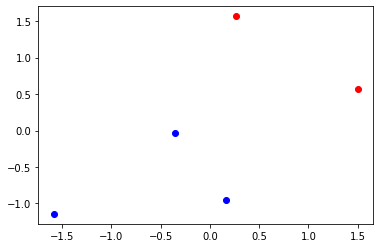

In [78]:
kmeans=KMeans(n_clusters=2, random_state=0).fit(Z)
y=kmeans.labels_
for i in range(0,2):
    plt.scatter(Z[np.where(y==i),0],Z[np.where(y==i),1], color = color[i])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


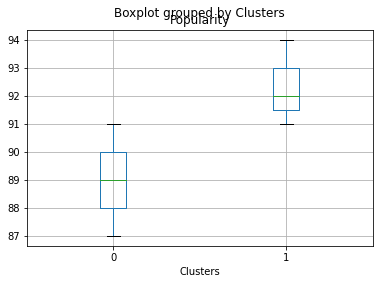

In [79]:
maxi_genere_rap["Clusters"]=kmeans.predict(Z)
maxi_genere_rap.boxplot(column='Popularity',by='Clusters')

Riusciamo quindi a dedurre dal confronto di questi due box plot che:
- utilizzando le due features che risultano correlate negativamente si arriva a distinguere in due cluster in modo migliore e quindi a predirre con più accuratezza un'ipotetica popolarità media di una nuova canzone rap.

Con le feature corelate sia positivamente che negativamente:

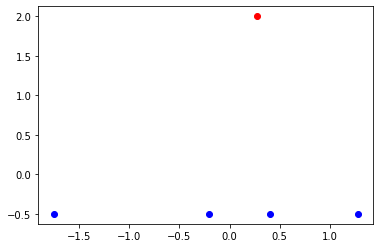

In [80]:
kmeans=KMeans(n_clusters=2, random_state=0).fit(A)
y=kmeans.labels_
for i in range(0,2):
    plt.scatter(A[np.where(y==i),0],A[np.where(y==i),1], color = color[i])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


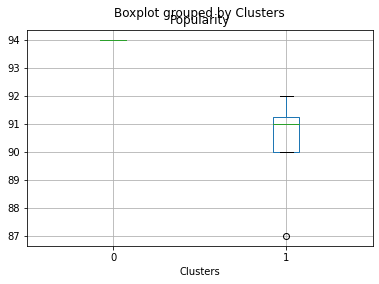

In [81]:
maxi_genere_rap["Clusters"]=kmeans.predict(A)
maxi_genere_rap.boxplot(column='Popularity',by='Clusters')

Utilizzando tutte le features correlate sia positivamente che negativamente alla popolarità non si riesce ad ottenere un'approssimazione accurata dato il poco numero di canzoni rap presenti.

Abbiamo quindi analizzato il macro genere più popolare e posizionato meglio in media nella classifica che stiamo esaminando.

Ora ripetiamo quello sopra effettuato per uno dei due macro generi più popolari e presenti nella classifica(come varianza di posizionamenti e di popolarità) che sono il pop e il dance come già riportato.



Prendiamo in esame il pop che presenta inoltre la posizione prima in classifica.

In [82]:
maxi_genere_pop.corr()

,Position,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
Position,1.000000,0.294807,0.196472,0.493400,-0.131884,0.270303,0.073033,-0.188742,-0.027904,0.207878,-0.094512
Beats.Per.Minute,0.294807,1.000000,0.268675,0.214895,0.483904,0.181319,0.294269,0.381477,-0.356204,0.505157,0.248595
Energy,0.196472,0.268675,1.000000,0.020974,0.666636,0.309515,0.656511,0.195656,-0.267816,0.151268,-0.204088
Danceability,0.493400,0.214895,0.020974,1.000000,-0.166492,0.020077,0.352035,0.118200,-0.349055,0.102530,-0.328043
Loudness..dB..,-0.131884,0.483904,0.666636,-0.166492,1.000000,0.126668,0.556381,0.496760,0.009666,0.035798,-0.066485
Liveness,0.270303,0.181319,0.309515,0.020077,0.126668,1.000000,0.391183,-0.481913,0.187193,-0.242253,0.046619
Valence.,0.073033,0.294269,0.656511,0.352035,0.556381,0.391183,1.000000,-0.049744,-0.246791,-0.233787,-0.476084
Length.,-0.188742,0.381477,0.195656,0.118200,0.496760,-0.481913,-0.049744,1.000000,-0.186614,0.557605,0.247880
Acousticness..,-0.027904,-0.356204,-0.267816,-0.349055,0.009666,0.187193,-0.246791,-0.186614,1.000000,-0.245339,-0.145281
Speechiness.,0.207878,0.505157,0.151268,0.102530,0.035798,-0.242253,-0.233787,0.557605,-0.245339,1.000000,0.461142


Estrapoliamo subito le features che sono più correlate alla Popolarità e procedendo in maniera del tutto analoga alla precedente:
- BPM, Length, Speechiness

Estrapoliamo subito le features che sono più scorrelate alla Popolarità e procedendo in maniera del tutto analoga alla precedente:
- Danceability, Valence, Energy

In [83]:
correlated_features_to_popularity_for_pop = ['Beats.Per.Minute','Length.','Speechiness.'] 
scorrelated_features_to_popularity_for_pop = ['Energy','Danceability','Valence.'] 
all_correlated_features_to_popularity_for_pop = ['Beats.Per.Minute','Length.','Speechiness.','Energy','Danceability','Valence.']

Andiamo ad eseguire quindi il fitting dei dati come in precedenza in base alle features che si vogliono utilizzare.

In [84]:
#correlate positivamente
X = maxi_genere_pop[correlated_features_to_popularity_for_pop]
X = np.asarray(X)
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

#correlate negativamete
Z = maxi_genere_pop[scorrelated_features_to_popularity_for_pop]
Z = np.asarray(Z)
scaler = preprocessing.StandardScaler().fit(Z)
Z = scaler.transform(Z)

#correlazione sia negativa che postivia
A = maxi_genere_pop[all_correlated_features_to_popularity_for_pop]
A = np.asarray(A)
scaler = preprocessing.StandardScaler().fit(A)
A = scaler.transform(A)

Con le features correlate positivamente:

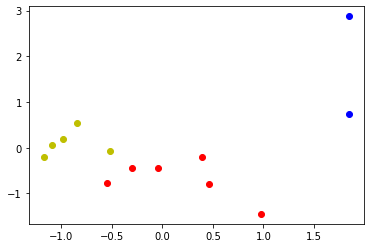

In [85]:
kmeans=KMeans(n_clusters=3, random_state=0).fit(X)
y=kmeans.labels_
for i in range(0,3):
    plt.scatter(X[np.where(y==i),0],X[np.where(y==i),1], color = color[i])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


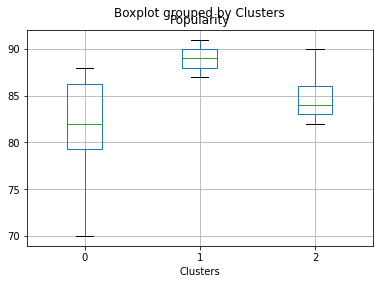

In [86]:
maxi_genere_pop["Clusters"]=kmeans.predict(X)
maxi_genere_pop.boxplot(column='Popularity',by='Clusters')

Con l'utilizzo di 3 cluster si riesce quindi a predire con successo la popolarità di una canzone del macro genere pop in base alle sue caratteristiche correlate positivamente.

Con le features correlate negativamente:

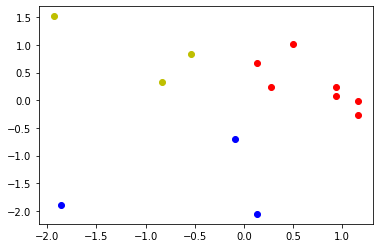

In [87]:
kmeans=KMeans(n_clusters=3, random_state=0).fit(Z)
y=kmeans.labels_
for i in range(0,3):
    plt.scatter(Z[np.where(y==i),0],Z[np.where(y==i),1], color = color[i])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


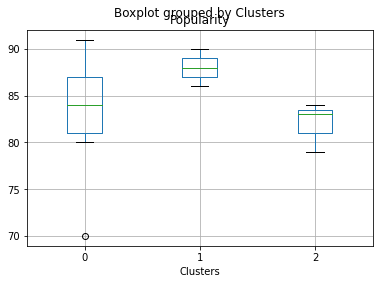

In [88]:
maxi_genere_pop["Clusters"]=kmeans.predict(Z)
maxi_genere_pop.boxplot(column='Popularity',by='Clusters')

Riusciamo quindi a dedurre dal confronto di questi due box plot sopra riportati che si ottengono più o meno le stesse previsioni, riuscendo così a predire in base alle caratteristiche della canzone pop una certa popolarità.

Con le feature corelate sia positivamente che negativamente:

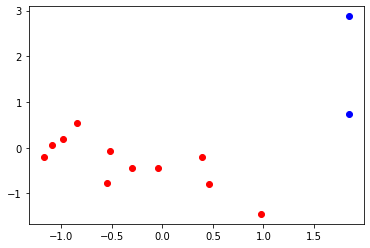

In [89]:
kmeans=KMeans(n_clusters=2, random_state=0).fit(A)
y=kmeans.labels_
for i in range(0,2):
    plt.scatter(A[np.where(y==i),0],A[np.where(y==i),1], color = color[i])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


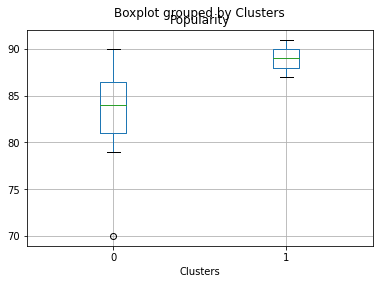

In [90]:
maxi_genere_pop["Clusters"]=kmeans.predict(A)
maxi_genere_pop.boxplot(column='Popularity',by='Clusters')

Utilizzando tutte le features correlate si riesce ad ottenere un buon risultato di previsione utilizzando due cluster come si può visualizzare nel box plot sopra riportato. 

Siamo quindi riusciti a risolvere i seguenti problemi di classificazione con i dati a disposizione:

- predire il genere di una canzone con tutti gli attributi di questa;
- predire il genere di una canzone con tutte le caratteristiche correlate di questa;
- predire il macro genere di una canzone con tutti gli attributi di questa;
- predire il macro genere di una canzone con tutte le caratteristiche correlate di questa;
- predire la popolarità di una canzone appartenente a qualsiasi genere a seconda dei suoi attributi;
- predire la popolarità di una canzone appartenente ad un macro genere in particolare(provato su rap e pop)

